## Assignment 4



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

##### Task 1: Load pokemon.csv into pandas dataframe



In [2]:
data = pd.read_csv('pokemon.csv', encoding='unicode_escape')

#### Task 2: Pick 5 features and analyze them



count    927.000000
mean      69.078209
std      126.450808
min        0.100000
25%        9.200000
50%       29.000000
75%       69.100000
max      999.900000
Name: Weight, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 927 entries, 0 to 926
Series name: Weight
Non-Null Count  Dtype  
--------------  -----  
927 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


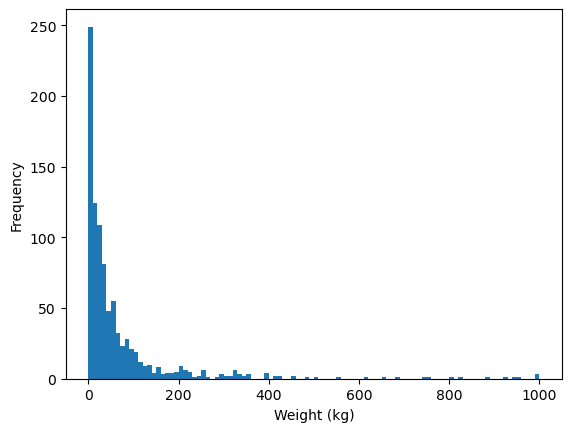

In [3]:
# Weight
print(data["Weight"].describe())
data["Weight"].info()

plt.hist(data["Weight"], bins=100)
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.show()


count    927.00000
mean       1.26246
std        1.30101
min        0.10000
25%        0.60000
50%        1.00000
75%        1.50000
max       14.50000
Name: Height, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 927 entries, 0 to 926
Series name: Height
Non-Null Count  Dtype  
--------------  -----  
927 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


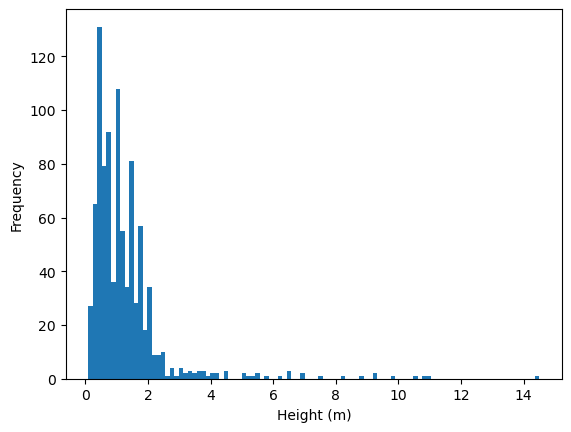

In [4]:
# Height
print(data["Height"].describe())
data["Height"].info()

plt.hist(data["Height"], bins=100)
plt.xlabel("Height (m)")
plt.ylabel("Frequency")
plt.show()

count    927.000000
mean      93.832794
std       75.485678
min        3.000000
25%       45.000000
50%       60.000000
75%      127.000000
max      255.000000
Name: Catch Rate, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 927 entries, 0 to 926
Series name: Catch Rate
Non-Null Count  Dtype
--------------  -----
927 non-null    int64
dtypes: int64(1)
memory usage: 7.4 KB


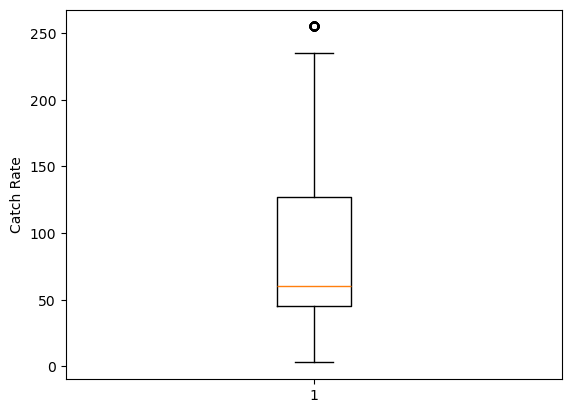

In [5]:
# Catch Rate
print(data["Catch Rate"].describe())
data["Catch Rate"].info()

plt.boxplot(data["Catch Rate"])
plt.ylabel("Catch Rate")
plt.show()

count     18.000000
mean      51.500000
std       31.438549
min        4.000000
25%       32.250000
50%       37.000000
75%       65.250000
max      124.000000
Name: count, dtype: float64
<class 'pandas.core.series.Series'>
Index: 18 entries, Water to Flying
Series name: count
Non-Null Count  Dtype
--------------  -----
18 non-null     int64
dtypes: int64(1)
memory usage: 288.0+ bytes


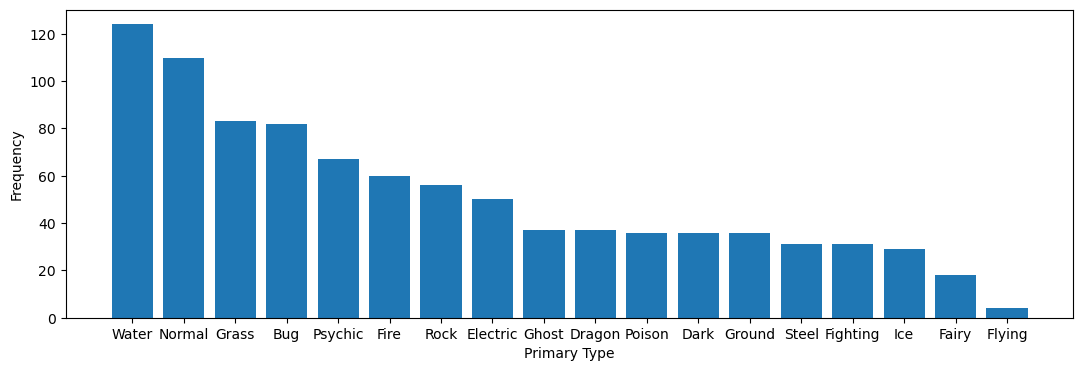

In [6]:
# Primary Type
primary_type = data["Primary Type"].value_counts()
print(primary_type.describe())
primary_type.info()

plt.figure(figsize=(13,4))
plt.bar(primary_type.index, primary_type.values)
plt.xlabel("Primary Type")
plt.ylabel("Frequency")
plt.show()

Water type pokemon are the most common as their primary type, followed by Normal type, while Flying type are the least common.

count    927.000000
mean     153.697950
std       79.254364
min       36.000000
25%       67.000000
50%      159.000000
75%      199.500000
max      608.000000
Name: Experience Yield, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 927 entries, 0 to 926
Series name: Experience Yield
Non-Null Count  Dtype
--------------  -----
927 non-null    int64
dtypes: int64(1)
memory usage: 7.4 KB


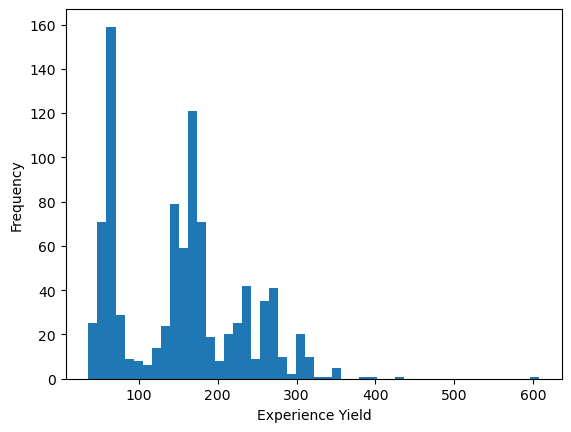

In [7]:
# Experience Yield
print(data["Experience Yield"].describe())
data["Experience Yield"].info()

plt.hist(data["Experience Yield"], bins=50)
plt.xlabel("Experience Yield")
plt.ylabel("Frequency")
plt.show()

Most pokemon have an experience yield between 64 and 200.

#### 3. Create correlation matrix



In [8]:
columns = data[["Height",
                "Weight",
                "Male Ratio",
                "Female Ratio",
                "Health EV",
                "Attack EV",
                "Defense EV",
                "Special Attack EV",
                "Special Defense EV",
                "Speed EV",
                "Catch Rate",
                "Experience Growth Total",
                "Experience Yield",
                "Base Happiness",
                "Health Base Stat",
                "Attack Base Stat",
                "Defense Base Stat"]]
columns.corr().style.background_gradient(cmap='coolwarm')

,Height,Weight,Male Ratio,Female Ratio,Health EV,Attack EV,Defense EV,Special Attack EV,Special Defense EV,Speed EV,Catch Rate,Experience Growth Total,Experience Yield,Base Happiness,Health Base Stat,Attack Base Stat,Defense Base Stat
Height,1.000000,0.642702,-0.165126,-0.201103,0.104100,0.148610,0.030735,0.163471,0.017089,-0.082543,-0.326175,0.264442,0.495432,-0.356754,0.442418,0.455615,0.378438
Weight,0.642702,1.000000,-0.206582,-0.266705,0.109945,0.156229,0.187516,0.066528,-0.005466,-0.140534,-0.287542,0.271490,0.437578,-0.426715,0.428633,0.413255,0.466624
Male Ratio,-0.165126,-0.206582,1.000000,-0.092943,-0.166520,0.083801,0.001981,-0.084910,-0.106987,0.023262,0.041688,-0.181977,-0.261750,0.309896,-0.185723,-0.048543,-0.153981
Female Ratio,-0.201103,-0.266705,-0.092943,1.000000,0.016880,-0.084653,0.009144,-0.200220,-0.003736,-0.005902,0.360023,-0.243806,-0.328712,0.322757,-0.125055,-0.296816,-0.204011
Health EV,0.104100,0.109945,-0.166520,0.016880,1.000000,-0.189908,-0.144446,-0.154329,-0.120933,-0.154012,-0.062831,0.050877,0.150328,0.006888,0.499442,-0.022253,-0.027597
Attack EV,0.148610,0.156229,0.083801,-0.084653,-0.189908,1.000000,-0.202250,-0.205496,-0.183959,-0.235962,-0.171854,0.126117,0.229218,-0.114406,0.170857,0.591903,0.074729
Defense EV,0.030735,0.187516,0.001981,0.009144,-0.144446,-0.202250,1.000000,-0.183443,-0.053005,-0.185629,-0.080840,0.013322,0.036753,-0.018413,-0.083103,0.029375,0.572870
Special Attack EV,0.163471,0.066528,-0.084910,-0.200220,-0.154329,-0.205496,-0.183443,1.000000,-0.122631,-0.161261,-0.200889,0.144015,0.312099,-0.139740,0.078662,0.042512,0.006005
Special Defense EV,0.017089,-0.005466,-0.106987,-0.003736,-0.120933,-0.183959,-0.053005,-0.122631,1.000000,-0.149626,-0.137420,-0.044050,0.134764,-0.005612,0.008403,-0.129563,0.115541
Speed EV,-0.082543,-0.140534,0.023262,-0.005902,-0.154012,-0.235962,-0.185629,-0.161261,-0.149626,1.000000,0.000294,-0.071211,0.018629,0.072458,-0.120068,-0.070918,-0.188373


##### Overall Observations

    - There is a strong positive correlation between Height and Weight, indicating that taller Pokémon tend to weigh more.

    - Base stats have a positive correlation toward each other meaning if one has a high base stat in one category, it usually has high base stats in others

    - Experience Yield has a positive correlation with the base stats, so the stronger the pokemon is, they more experience they give

    - Male Ratio and Female Ratio should have a -1 correlation, but isn't because of pokemon with unknown genders.


#### 4. Identify two feature pairs



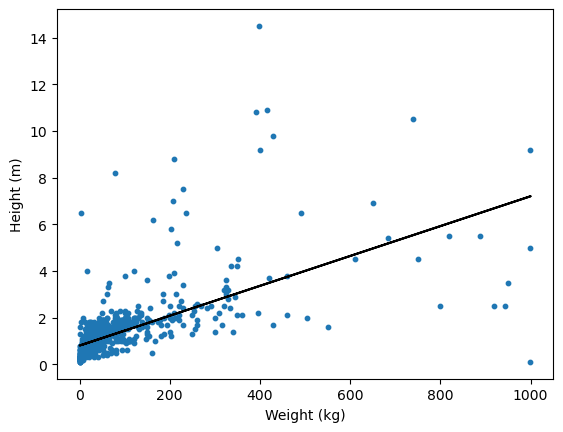

In [9]:
x = data["Weight"]
y = data["Height"]

# Scatter plot
plt.scatter(x, y, s=10)
plt.xlabel("Weight (kg)")
plt.ylabel("Height (m)")

# Line
plt.plot(x, 0.0064 * x + 0.8, color='black')

plt.show()

I think that there is a true logical relationship between them since they taller and bigger a pokemon is, the heavier they would be.

[[ 1. -1.]
 [-1.  1.]]


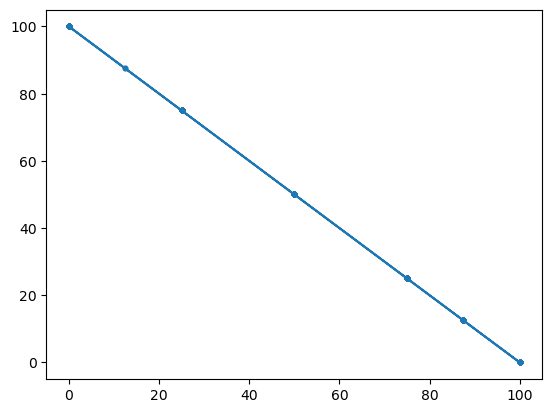

In [10]:
x = data["Male Ratio"]
y = data["Female Ratio"]
# Removing pokemon that have 0 for both male and femal ratio
x = x[(x != 0) | (y != 0)]
y = y[(x != 0) | (y != 0)]
print(np.corrcoef(x, y)) # New correlation coefficient

# Scatter plot
plt.scatter(x, y, s=10)

# Line 
plt.plot(x, 100-x)

plt.show()

After removing the pokemon with a 0 for both male and female ratio, it results in a -1 correlation, so the data is perfectly aligned. So I think there is a true logical relationship between the male and female ratio since they are mutually exclusive.

#### 5. Identify a feature pair showing minimal or no correlation between them



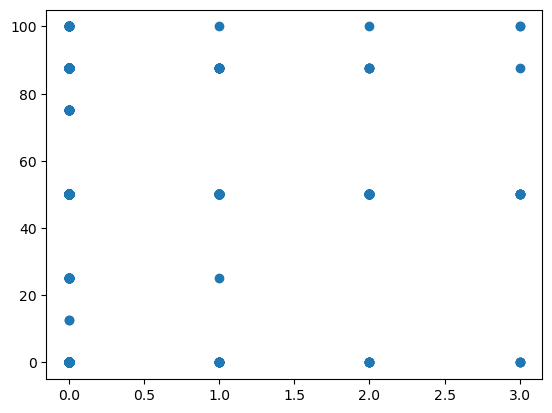

In [11]:
x = data["Defense EV"]
y = data["Male Ratio"]

# Scatter Plot
plt.scatter(x, y)
plt.show()

Can't draw a straight line in this case since there is very minimal correlation between the pair.

I don't think there a true logical relationship between defense ev and male ratio since there is almost no correlation between them.